In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image as kimage


In [2]:
ls

A_star.ipynb             iris.data                multi_logisticReg.ipynb
NN.ipynb                 kmean.ipynb              object_detection.ipynb
baocao.docx              logisticReg.ipynb        softmax.ipynb
data/                    main.ipynb               template_matching.ipynb
genetic.ipynb            minimax_chess.ipynb


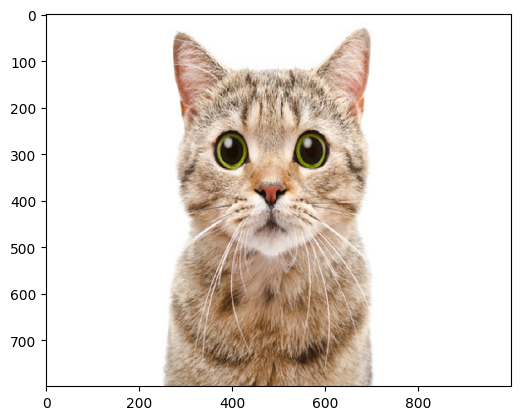

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as kimage

PATH = './data/'

height = 800
width  = 1000

# load an image
image = kimage.load_img(PATH+'image2.jpg', target_size=(height, width))

# show the image
plt.figure(figsize=(6,6))
plt.imshow(image)

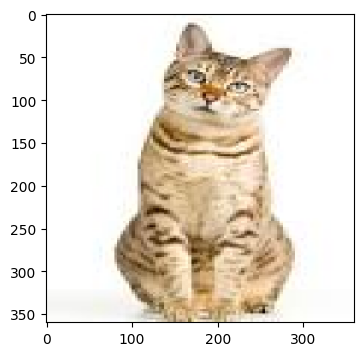

In [4]:
# show results
import matplotlib
import matplotlib.pyplot as plt

# create a template
side = 360
template = kimage.load_img(PATH+'template.jpg', target_size=(side, side))

# show the template
plt.figure(figsize=(4,4))
plt.imshow(template)

In [5]:
# normalize
image    = kimage.img_to_array(image)/255.0
template = kimage.img_to_array(template)/255.0

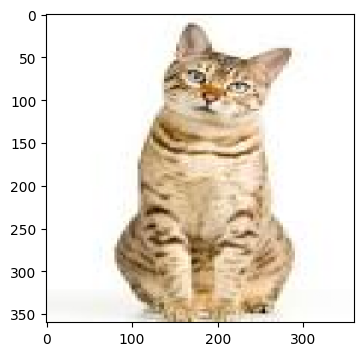

In [6]:
# change template
#template = template - 90.0/255.0
#template = np.clip(template, 0.0, 1.0)

plt.figure(figsize=(4,4))
plt.imshow(template)

In [7]:
print(height, side, width)
distances = []
for i in range(height-side+1):
  for j in range(width-side+1):
    patch = image[i:i+side,j:j+side,:]
    dis = np.sum(np.absolute(template - patch))
    distances.append((dis, i, j))

print(len(distances))
print(distances[0][0])

KeyboardInterrupt: 

In [ ]:
def getKey(item):
    return item[0]

distances_sorted = sorted(distances, key=getKey, reverse=False)
print(distances_sorted[:3])

[(75171.54, 0, 67), (75172.34, 0, 66), (75175.16, 0, 68)]


<Figure size 1600x1600 with 0 Axes>

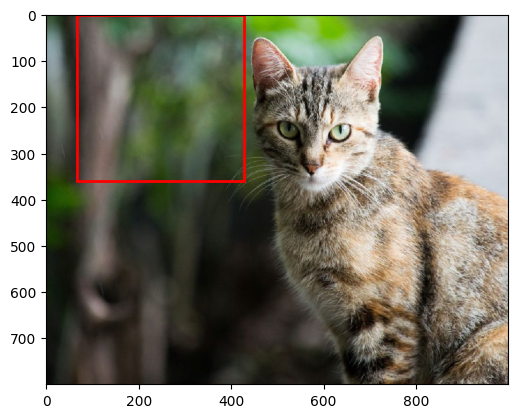

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = kimage.load_img(PATH+'image2.jpg', target_size=(800, 1000))

plt.figure(figsize=(16,16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for i in range(1): 
  rect = patches.Rectangle((distances_sorted[i][2], distances_sorted[i][1]), 
                           side, side, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Load the main image and the template
main_image = cv2.imread('data/image2.jpg', 0)
template = cv2.imread('data/template.jpg', 0)

# Resize the template to match the size of the main image
template = cv2.resize(template, (main_image.shape[1], main_image.shape[0]))

# Convert the images to float32 and normalize
main_image = main_image.astype(np.float32) / 255.0
template = template.astype(np.float32) / 255.0

# Reshape the images to add a channel dimension
main_image = np.expand_dims(main_image, axis=-1)
template = np.expand_dims(template, axis=-1)

# Convert the images to TensorFlow tensors
main_image_tensor = tf.convert_to_tensor(main_image)
template_tensor = tf.convert_to_tensor(template)

# Perform template matching using cross-correlation
result = tf.nn.conv2d(main_image_tensor, template_tensor, strides=[1, 1, 1, 1], padding='VALID')

# Normalize the result to the range [0, 1]
result = tf.nn.sigmoid(result)

# Convert the result back to a NumPy array
result = result.numpy()

# Find the location of the maximum value in the result
max_value = np.max(result)
max_location = np.where(result == max_value)
max_location = (max_location[1][0], max_location[2][0])  # (x, y) coordinates

# Draw a rectangle around the matched region in the main image
matched_image = cv2.rectangle(main_image, max_location, (max_location[0] + template.shape[1], max_location[1] + template.shape[0]), (0, 255, 0), 2)

# Display the matched image
cv2.imshow('Matched Image', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()